In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
alldata = pd.read_csv('../data/medications.csv')

In [3]:
alldata['COVERAGE_RATIO'] = (alldata['PAYER_COVERAGE']/ alldata['BASE_COST'])

# alldata.head(10)
alldata['START'] = pd.to_datetime(alldata['START'])

# print(len(alldata))

In [ ]:
alldata.head()

In [ ]:
totalcost = alldata['TOTALCOST']

x_vals = np.linspace(min(totalcost), max(totalcost), 100)  # Generate x values


insurancepayout = totalcost * alldata['COVERAGE_RATIO']
plt.figure()
plt.plot(totalcost, insurancepayout, '.', ms = 1.5)
plt.plot(x_vals, x_vals, 'r--', label='y = x ')
# plt.plot(x_vals, 0.8 * x_vals , 'y--', label='y = 0.8x')
# plt.plot(x_vals, 0.6 * x_vals , 'k--', label='y = 0.6x')
plt.plot(x_vals, 0.2 * x_vals , 'g--', label='y = 0.2x')
plt.plot(x_vals, 0.01 * x_vals , 'p--', label='y = 0.01x')
plt.title('Total Cost vs Insurance Payout Over Time')
plt.ylabel('Total Cost Customer')
plt.xlabel('Insurance')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

In [ ]:
maxtotal = totalcost.max()
maxinsurance = insurancepayout.max()
print(maxtotal)
print(maxinsurance)

C:\Users\aditi\AppData\Local\Temp\ipykernel_3148\2949197092.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  alldata['YYMM'] = alldata['START'].dt.to_period("Y")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


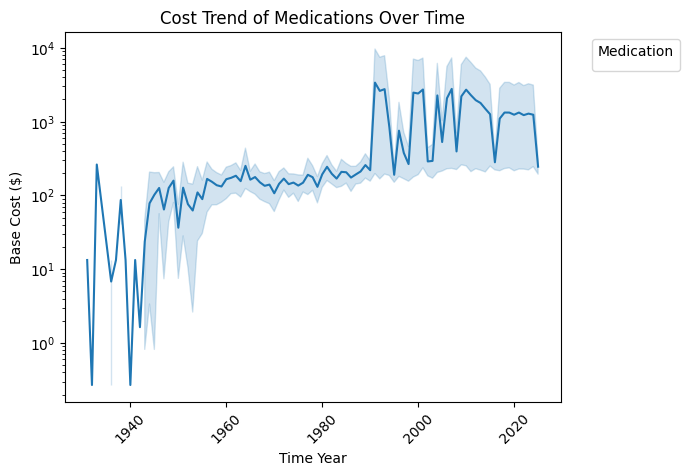

In [18]:
alldata['YYMM'] = alldata['START'].dt.to_period("Y")

medcost_py = alldata.groupby(['YYMM', 'DESCRIPTION'])['BASE_COST'].mean().reset_index()

medcost_py['YYMM'] = medcost_py['YYMM'].astype(str)
medcost_py['YYMM'] = pd.to_datetime(medcost_py['YYMM'])

plt.figure()
sns.lineplot(data= medcost_py, x = 'YYMM', y = 'BASE_COST',)
plt.title("Cost Trend of Medications Over Time")
plt.ylabel("Base Cost ($)")
plt.xlabel("Time Year")
plt.yscale('log')
plt.xticks(rotation=45)
plt.legend(title="Medication", bbox_to_anchor=(1.05, 1), loc="upper left")  # Legend outside
plt.show()

C:\Users\aditi\AppData\Local\Temp\ipykernel_3148\1497500751.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  alldata['YYMM'] = alldata['START'].dt.to_period("Y")


   YYMM                                        DESCRIPTION  BASE_COST
0  1931  Acetaminophen 325 MG / oxyCODONE Hydrochloride...      13.34
1  1932                 ferrous sulfate 325 MG Oral Tablet       0.27
2  1933              Hydrocortisone 10 MG/ML Topical Cream     262.28
3  1936  Acetaminophen 325 MG / oxyCODONE Hydrochloride...      13.34
4  1936                 ferrous sulfate 325 MG Oral Tablet       0.27
5230 5229


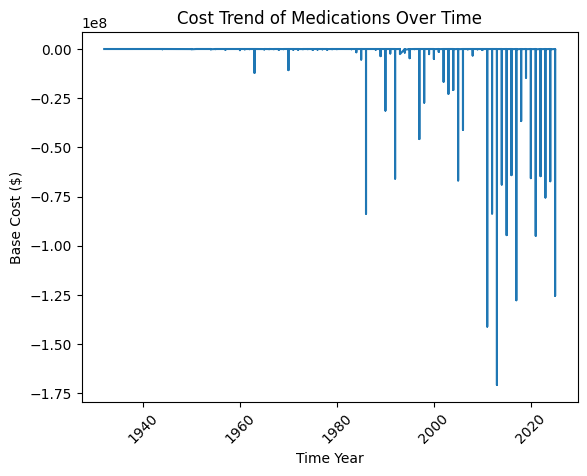

In [41]:
alldata['YYMM'] = alldata['START'].dt.to_period("Y")

medcost_py = alldata.groupby(['YYMM', 'DESCRIPTION'])['BASE_COST'].sum().reset_index()
print(medcost_py.head())
medcost_py['YYMM'] = medcost_py['YYMM'].astype(str)
medcost_py['YYMM'] = pd.to_datetime(medcost_py['YYMM'])
plt.figure()
print(len(medcost_py['BASE_COST']),len(medcost_py['BASE_COST'][1:]))
basecost = medcost_py['BASE_COST'].values
y = []
for i in range(len(basecost)):
    if i ==0: continue
    y.append(((basecost[i]-basecost[i-1])/basecost[i]) * 100)
# medcost_py['DIFF'] = basecost[1:]-basecost[:len(basecost)-1]
# print(medcost_py['DIFF'].head(10))
# plt.plot(data= medcost_py, x = 'YYMM', y = 'DIFF', hue= 'DESCRIPTION')

plt.plot(medcost_py['YYMM'].iloc[1:], y)
plt.title("Cost Trend of Medications Over Time")
plt.ylabel("Base Cost ($)")
plt.xlabel("Time Year")
# plt.yscale('log')
plt.xticks(rotation=45)
# plt.legend(title="Medication", bbox_to_anchor=(1.05, 1), loc="upper left")  # Legend outside
plt.show()